<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/Neural-Networks/blob/master/CNN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - deep learnig basics with python, tf, keras

CNN - https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

Into Neural Network - https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

Bias - https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks

Backpropagation - http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html

CNN(mathematical expl) -https://cs231n.github.io/convolutional-networks/
         https://andrew.gibiansky.com/blog/machine-learning/convolutional-neural-networks/

python numpy tut -https://cs231n.github.io/python-numpy-tutorial/

In [0]:
#importing keras 
import keras

Using TensorFlow backend.


In [0]:
#importing mnist dataset from keras
mnist = keras.datasets.mnist

In [0]:
#loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


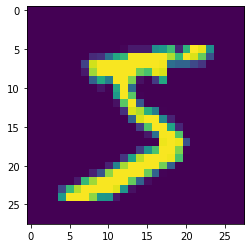

5


In [0]:
#importing matplotlib to plot the image
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [0]:
#reshaping the x_train
x_train = x_train.reshape(x_train.shape[0],  28,28,1)
x_test = x_test.reshape(x_test.shape[0],  28,28,1)


input_size = (28,28,1)

#normalizing the dataset by scaling
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

In [0]:
#one hot encoding: categorical to numeric
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0])
#only the position is stuffed with 1(0 to 9)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#building model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_size))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size= (2,2)))
model.add(keras.layers.Dropout(0.25))
#drop out layer: so many layers take more computations, so we randomly select
model.add(keras.layers.Flatten())
#flatten the image
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))


In [0]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.adadelta(), metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size =128, epochs = 20, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2538 - accuracy: 0.9209 - val_loss: 0.0575 - val_accuracy: 0.9808
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0878 - accuracy: 0.9733 - val_loss: 0.0379 - val_accuracy: 0.9876
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0650 - accuracy: 0.9806 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0357 - val_accuracy: 0.9877
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0467 - accuracy: 0.9864 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0315 - val_accuracy: 0.9895
Epoch 7/20
60000/60000 [==============================] - 3s 55us/

In [0]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 64us/step
[0.03051569730680004, 0.9915000200271606]
